### Bibliotecas

In [1]:
#Pandas
import pandas as pd 

#Folium 
import folium 

# Adicionando os registros no mapa de calor:
from folium import plugins

#Numpy (Computação Científica)
import numpy as np

#Visualização
import seaborn as sns

### Carga dos Dados 

In [9]:
# Carga de dados no dataset inicial 
df_vacinas = pd.read_excel(
    "../Base_Mapas/Base_Vacinas_Tratadas_Mapas.xlsx"
    , sheet_name=0, na_values = ['', ' ']
    , dtype  = {'CODMUN7': np.int64, 'ano': np.int32, 'Estado': 'category'
        , 'CV_SCR1 (1 ano)': np.float32, 'CV_SCR2 (15 meses)': np.float32, 'Poprural': np.float32
        , 'PopUrb': np.float32, 'RDPC': np.float32, 'PEA': np.float32, 'PEA_A': np.float32
        , 'IDHM': np.float32, 'IDHM_E': np.float32, 'IDHM_L': np.float32, 'IDHM_R': np.float32
        , 'T_ANALF18M': np.float32, 'T_MED18M': np.float32,'T_SUPER25M': np.float32, 'T_AGUA': np.float32
        , 'T_BANAGUA': np.float32, 'T_DENS': np.float32, 'T_LIXO': np.float32
        , 'T_LUZ': np.float32,'AGUA_ESGOTO': np.float32, 'POPDOMCHEFMULHERES': np.float32, 'DENSDEMOG2010': np.float32
        , 'PERC_NV_7CPN': np.float32,'CoberturaAB': np.float32
})

df_vacinas.rename(columns={'Estado': 'UF', 'ano':'ANO','Nome': 'MUNICIPIO', 'CV_SCR1 (1 ano)': 'CV_SCR1'
                          , 'CV_SCR2 (15 meses)': 'CV_SCR2', 'Poprural': 'POPRURAL', 'PopUrb': 'POPURB'
                          , 'CoberturaAB': 'COBERTURA_AB'}, inplace=True)

df_vacinas.shape

(1347, 29)

In [15]:
# Carga de dados de localização de muncipios

df_estados = pd.read_csv('../Base_Mapas/estados.csv', sep = ',', encoding = 'utf-8', low_memory=False, decimal='.')

df_municipios = pd.read_csv('../Base_Mapas/municipios.csv', sep = ',', encoding = 'utf-8', low_memory=False, decimal='.')


df_estados.rename(columns={'codigo_uf': 'CODIGO_UF', 'uf':'UF','nome': 'ESTADO', 'latitude': 'LATITUDE'
                          , 'longitude': 'LONGITUDE'}, inplace=True)

In [4]:
df_vacinas.head(2)

,COD,CODMUN7,UF,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.73,57.270000,476.989990,...,93.690002,80.199997,22.58,94.050003,93.980003,9.31,26.920000,3.45,67.180000,80.930000
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.30,84.699997,689.950012,...,98.540001,85.349998,27.15,96.720001,98.580002,11.40,32.630001,20.41,72.620003,61.919998


In [10]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5)
mapa

In [17]:
# Merge dataset vacinas e geolocalização
df_plot_estados = pd.merge(df_vacinas, df_estados, how='left', left_on='UF', right_on='ESTADO')
df_plot_estados.head(2)

,COD,CODMUN7,UF_x,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,CODIGO_UF,UF_y,ESTADO,LATITUDE,LONGITUDE
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.73,57.270000,476.989990,...,9.31,26.920000,3.45,67.180000,80.930000,11,RO,Rondônia,-10.83,-63.34
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.30,84.699997,689.950012,...,11.40,32.630001,20.41,72.620003,61.919998,11,RO,Rondônia,-10.83,-63.34


In [20]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.4,tiles='Stamen Toner')

In [18]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_plot_estados.LATITUDE.values,df_plot_estados.LONGITUDE.values):
       coordenadas.append([lat,lng])

In [19]:
# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

### Distribuição dos dados no nível de município

In [21]:
# Merge dataset vacinas e geolocalização
df_plot_municipios = pd.merge(df_vacinas, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')

In [24]:
df_plot_municipios.head(2)

,COD,CODMUN7,UF,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.73,57.270000,476.989990,...,26.920000,3.45,67.180000,80.930000,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.30,84.699997,689.950012,...,32.630001,20.41,72.620003,61.919998,1100023,Ariquemes,-9.90571,-63.0325,0,11


In [22]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_plot_municipios.latitude.values,df_plot_municipios.longitude.values):
  coordenadas.append([lat,lng])

In [23]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5,tiles='Stamen Toner')

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

### Municipios com aplicação de primeira dose entre < 50%

In [24]:
df_municipios_1d_50 = df_vacinas[df_vacinas['CV_SCR1'] < 50]

In [5]:
df_municipios_1d_50.shape

(45, 29)

In [25]:
# Merge dataset vacinas e geolocalização
df_municipios_1d_50 = pd.merge(df_municipios_1d_50, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')

In [26]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_1d_50.latitude.values,df_municipios_1d_50.longitude.values):
  coordenadas.append([lat,lng])

In [27]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5,tiles='Stamen Toner')

# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [9]:
df_municipios_1d_50.shape

(45, 35)

In [13]:
df_municipios_1d_50.head()

,COD,CODMUN7,UF,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,110175,1101757,Rondônia,2016,Vale do Anari,34.950001,18.450001,65.980003,34.020000,394.019989,...,20.459999,2.99,81.820000,63.639999,1101757,Vale do Anari,-9.86215,-62.1876,0,11
1,130140,1301407,Amazonas,2016,Eirunep‚,49.380001,40.750000,27.719999,72.279999,241.860001,...,38.740002,2.04,42.570000,91.260002,1301407,Eirunepé,-6.65677,-69.8662,0,13
2,130220,1302207,Amazonas,2016,Juru,48.130001,24.299999,47.360001,52.639999,227.389999,...,39.820000,0.56,39.430000,52.279999,1302207,Juruá,-3.48438,-66.0718,0,13
3,130230,1302306,Amazonas,2016,Juta¡,36.570000,37.060001,41.349998,58.650002,214.360001,...,24.650000,0.26,23.340000,100.000000,1302306,Jutaí,-2.75814,-66.7595,0,13
4,130250,1302504,Amazonas,2016,Manacapuru,23.600000,19.330000,29.320000,70.680000,342.579987,...,35.799999,11.62,41.060001,92.250000,1302504,Manacapuru,-3.29066,-60.6216,0,13


In [24]:
# Quantidade de municipios menor de 50% na primeira dose
pd.value_counts(df_municipios_1d_50["UF"])

Pará         24
Amazonas      8
Tocantins     5
Acre          3
Roraima       2
Rondônia      2
Amapá         1
Name: UF, dtype: int64

### Municipios com aplicação de segunda dose entre < 50%

In [28]:
df_municipios_2d_50 = df_vacinas[df_vacinas['CV_SCR2'] < 50]

In [11]:
df_municipios_2d_50.shape

(151, 29)

In [29]:
# Merge dataset vacinas e geolocalização
df_municipios_2d_50 = pd.merge(df_municipios_2d_50, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')

In [30]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_2d_50.latitude.values,df_municipios_2d_50.longitude.values):
  coordenadas.append([lat,lng])

In [31]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5,tiles='Stamen Toner')


# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [41]:
#Quantidade de municipios menor de 50% na segunda dose
pd.value_counts(df_municipios_2d_50["UF"])

Pará         74
Amazonas     30
Tocantins    13
Acre         13
Rondônia     11
Amapá         6
Roraima       4
Name: UF, dtype: int64

#### Municipios com aplicação ideal na primeira dose, entre 95% e 120%

In [32]:
df_municipios_1d_ideal = df_vacinas[(df_vacinas["CV_SCR1"] >= 95) & (df_vacinas["CV_SCR1"] <= 120)]

In [30]:
df_municipios_1d_ideal.shape


(438, 29)

In [34]:
# Merge dataset vacinas e geolocalização
df_municipios_1d_ideal = pd.merge(df_municipios_1d_ideal, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')
df_municipios_1d_ideal.shape
df_municipios_1d_ideal.head(2)

,COD,CODMUN7,UF,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.73,57.270000,476.989990,...,26.920000,3.45,67.180000,80.930000,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.30,84.699997,689.950012,...,32.630001,20.41,72.620003,61.919998,1100023,Ariquemes,-9.90571,-63.0325,0,11


In [35]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_1d_ideal.latitude.values,df_municipios_1d_ideal.longitude.values):
  coordenadas.append([lat,lng])

In [36]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5,tiles='Stamen Toner')

#Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [20]:
#Quantidade de municipios de aplicação ideal primeira dose
pd.value_counts(df_municipios_1d_ideal["UF"])

Tocantins    178
Pará          86
Rondônia      69
Amazonas      66
Acre          16
Roraima       12
Amapá         11
Name: UF, dtype: int64

#### Municipios com aplicação ideal na segunda dose, entre 95% e 120%

In [37]:
df_municipios_2d_ideal = df_vacinas[(df_vacinas["CV_SCR2"] >= 95) & (df_vacinas["CV_SCR2"] <= 120)]

In [38]:
#Merge dataset vacinas e geolocalização
df_municipios_2d_ideal = pd.merge(df_municipios_2d_ideal, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')
df_municipios_2d_ideal.shape

(246, 35)

In [39]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_2d_ideal.latitude.values,df_municipios_2d_ideal.longitude.values):
  coordenadas.append([lat,lng])

In [40]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5,tiles='Stamen Toner')

#Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [22]:
pd.value_counts(df_municipios_2d_ideal["UF"])

Tocantins    115
Rondônia      49
Pará          33
Amazonas      24
Roraima       10
Amapá          9
Acre           6
Name: UF, dtype: int64

## Análise Exploratória 

In [46]:
#Quantidade de municipios menor de 50% na primeira dose
pd.value_counts(df_municipios_1d_50["UF"])

Pará         24
Amazonas      8
Tocantins     5
Acre          3
Roraima       2
Rondônia      2
Amapá         1
Name: UF, dtype: int64

In [47]:
#Quantidade de municipios menor de 50% na segunda dose
pd.value_counts(df_municipios_2d_50["UF"])

Pará         74
Amazonas     30
Tocantins    13
Acre         13
Rondônia     11
Amapá         6
Roraima       4
Name: UF, dtype: int64

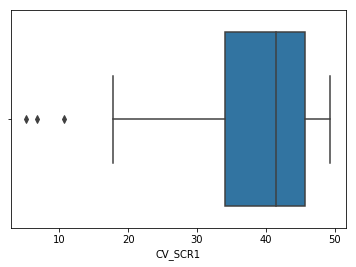

In [35]:
# Visualizando os outliers na primeira dose 
sns.boxplot(df_municipios_1d_50.CV_SCR1)

In [34]:
#Descobrindo o valor de outlier
df_municipios_1d_50[df_municipios_1d_50["CV_SCR1"] < 20]

,COD,CODMUN7,UF,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
11,150280,1502806,Pará,2016,Curralinho,10.630000,13.770000,61.709999,38.290001,188.880005,...,24.400000,7.890000,27.360001,42.790001,1502806,Curralinho,-1.81179,-49.7952,0,15
20,150635,1506351,Pará,2016,Santa B rbara do Par,17.730000,14.540000,68.160004,31.840000,287.250000,...,33.730000,61.619999,45.480000,87.809998,1506351,Santa Bárbara do Pará,-1.19219,-48.2380,0,15
26,171884,1718840,Tocantins,2016,Sandolƒndia,5.130000,17.950001,46.959999,53.040001,393.980011,...,20.020000,0.940000,67.440002,100.000000,1718840,Sandolândia,-12.53800,-49.9242,0,17
28,130330,1303304,Amazonas,2017,Novo Aripuanã,6.753247,4.935065,34.389999,65.610001,219.690002,...,27.620001,0.520000,41.871922,69.790001,1303304,Novo Aripuanã,-5.12593,-60.3732,0,13


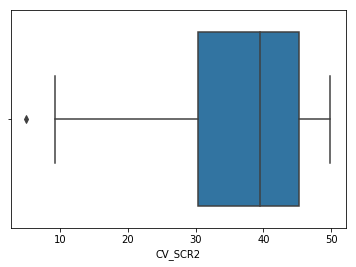

In [50]:
# Visualizando os outliers na segunda dose 
sns.boxplot(df_municipios_2d_50.CV_SCR2)

In [51]:
#Descobrindo o valor de outlier 
df_municipios_2d_50[df_municipios_2d_50["CV_SCR2"] == min(df_municipios_2d_50["CV_SCR2"])]

,COD,CODMUN7,UF,ANO,MUNICIPIO,CV_SCR1,CV_SCR2,POPRURAL,POPURB,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
70,130330,1303304,Amazonas,2017,Novo Aripuanã,6.753247,4.935065,34.389999,65.610001,219.690002,...,27.620001,0.52,41.871922,69.790001,1303304,Novo Aripuanã,-5.12593,-60.3732,0,13


In [23]:
# Média por estado na primeira dose 
df_municipios_1d_50.groupby(["UF"])["CV_SCR1"].mean()

UF
Acre         37.249554
Amapá        46.029999
Amazonas     38.317810
Pará         37.521156
Rondônia     36.305000
Roraima      43.489998
Tocantins    37.704002
Name: CV_SCR1, dtype: float32

In [24]:
# Média por estado na segunda dose
df_municipios_2d_50.groupby(["UF"])["CV_SCR2"].mean()

UF
Acre         32.862499
Amapá        42.726532
Amazonas     38.487511
Pará         37.855793
Rondônia     37.293587
Roraima      35.114563
Tocantins    31.914757
Name: CV_SCR2, dtype: float32

In [25]:
# Média por Estado e por ano na primeira dose em municipios com < 50%
df_municipios_1d_50.groupby(["UF","ANO"])["CV_SCR1"].mean()

UF         ANO 
Acre       2017    32.388664
           2018    39.680000
Amapá      2016    46.029999
Amazonas   2016    42.336666
           2017    26.261238
Pará       2016    37.442001
           2017    39.379238
           2018    36.790001
Rondônia   2016    34.950001
           2018    37.660000
Roraima    2016    45.480000
           2018    41.500000
Tocantins  2016    32.636669
           2018    45.305000
Name: CV_SCR1, dtype: float32

In [26]:
# Média por Estado e por ano na segunda dose em municipios com < 50%
df_municipios_2d_50.groupby(["UF","ANO"])["CV_SCR2"].mean()

UF         ANO 
Acre       2016    29.581667
           2017    37.818119
           2018    32.816666
Amapá      2016    45.196667
           2017    47.959183
           2018    36.404999
Amazonas   2016    37.981667
           2017    38.427521
           2018    40.215000
Pará       2016    37.145454
           2017    39.024529
           2018    37.412144
Rondônia   2016    33.560001
           2017    41.667892
           2018    33.736668
Roraima    2016    21.430000
           2017    49.158249
           2018    34.934998
Tocantins  2016    33.276669
           2017    35.697281
           2018    29.710001
Name: CV_SCR2, dtype: float32

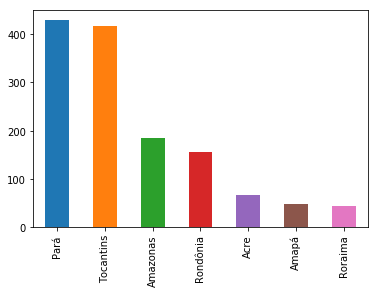

In [61]:
#Distribuição dos dados entre os Estados
df_vacinas["UF"].value_counts().plot(kind='bar')

In [29]:
# Média por estado na primeira dose em municipios com cobertura ideal 
df_municipios_1d_ideal.groupby(["UF"])["CV_SCR1"].mean()

UF
Acre         104.349594
Amapá        108.377998
Amazonas     105.199829
Pará         104.658722
Rondônia     108.101837
Roraima      104.416138
Tocantins    106.263672
Name: CV_SCR1, dtype: float32

In [28]:
# Média por Estado e por ano na primeira dose em municipios com cobertura ideal   
df_municipios_1d_ideal.groupby(["UF","ANO"])["CV_SCR1"].mean()

UF         ANO 
Acre       2016    107.816666
           2017    102.775444
           2018    104.788002
Amapá      2016    109.847504
           2017    108.031990
           2018    106.879997
Amazonas   2016    104.096001
           2017    105.244759
           2018    105.793465
Pará       2016    102.833122
           2017    102.707191
           2018    106.391998
Rondônia   2016    108.790771
           2017    109.912910
           2018    105.123497
Roraima    2016    107.106667
           2017    103.587280
           2018    103.383331
Tocantins  2016    107.339104
           2017    106.695801
           2018    104.604263
Name: CV_SCR1, dtype: float32

In [32]:
df_municipios_1d_ideal.groupby(["UF","ANO"])["CV_SCR1"].count()

UF         ANO 
Acre       2016     3
           2017     8
           2018     5
Amapá      2016     4
           2017     4
           2018     3
Amazonas   2016    15
           2017    25
           2018    26
Pará       2016    16
           2017    25
           2018    45
Rondônia   2016    26
           2017    23
           2018    20
Roraima    2016     3
           2017     6
           2018     3
Tocantins  2016    56
           2017    68
           2018    54
Name: CV_SCR1, dtype: int64

In [30]:
df_vacinas.groupby(["UF","ANO"])["UF"].count().sort_values(ascending=False)

UF         ANO 
Pará       2017    143
           2018    143
           2016    143
Tocantins  2017    139
           2018    139
           2016    139
Amazonas   2018     62
           2017     62
           2016     62
Rondônia   2018     52
           2017     52
           2016     52
Acre       2018     22
           2017     22
           2016     22
Amapá      2018     16
           2017     16
           2016     16
Roraima    2016     15
           2017     15
           2018     15
Name: UF, dtype: int64

In [31]:
# Média por Estado e por ano na segunda dose em municipios com cobertura ideal
df_municipios_2d_ideal.groupby(["UF","ANO"])["CV_SCR2"].mean()

UF         ANO 
Acre       2016    108.574997
           2017     97.523216
           2018    105.516663
Amapá      2016    100.303329
           2017    103.064468
           2018    103.820000
Amazonas   2016    104.955559
           2017    102.432014
           2018    102.717499
Pará       2016    102.605003
           2017    103.286842
           2018    102.724442
Rondônia   2016    106.569504
           2017    102.965721
           2018    103.476875
Roraima    2016    106.005005
           2017    103.187523
           2018    102.233337
Tocantins  2016    106.569771
           2017    106.099045
           2018    105.029358
Name: CV_SCR2, dtype: float32

In [33]:
#### Municipios com aplicação maior que 120% na primeira aplicação
df_municipios_1d_M120 = df_vacinas[(df_vacinas["CV_SCR1"] >= 120)]

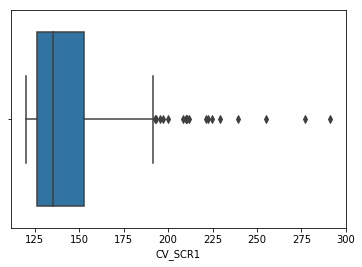

In [34]:
# Visualizando os outliers na segunda dose 
sns.boxplot(df_municipios_1d_M120.CV_SCR1)

In [33]:
df_municipios_1d_M120.groupby(["UF","ANO"])["CV_SCR1"].mean()

UF         ANO 
Acre       2016    197.119995
           2017    156.376266
           2018    138.955002
Amapá      2016    160.000000
           2017    158.485855
           2018    146.240005
Amazonas   2016    124.776001
           2017    131.607849
           2018    154.154160
Pará       2016    145.800003
           2017    138.914093
           2018    149.311249
Rondônia   2016    135.891663
           2017    144.588120
           2018    154.575790
Roraima    2016    121.270004
           2017    154.878052
           2018    176.639999
Tocantins  2016    132.903427
           2017    134.657120
           2018    151.003006
Name: CV_SCR1, dtype: float32

In [78]:
#### Municipios com aplicação maior que 120% na primeira aplicação
df_municipios_2d_M120 = df_vacinas[(df_vacinas["CV_SCR2"] >= 120)]

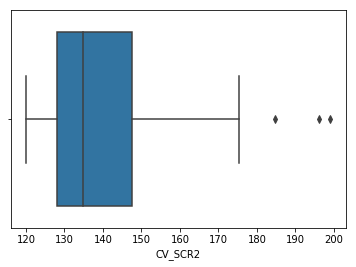

In [79]:
# Visualizando os outliers na segunda dose 
sns.boxplot(df_municipios_2d_M120.CV_SCR2)

In [80]:
df_municipios_2d_M120.groupby(["UF","ANO"])["CV_SCR2"].mean()

UF         ANO 
Acre       2016    169.059998
           2017    135.555557
Amapá      2016    132.940002
           2017    153.790710
Amazonas   2016    146.705002
           2018    144.050003
Pará       2016    138.197495
           2017    144.965790
           2018    126.020004
Rondônia   2016    138.943634
           2017    134.137878
           2018    138.753326
Roraima    2016    122.959999
           2017    129.332703
           2018    177.235001
Tocantins  2016    141.788467
           2017    141.267563
           2018    127.894165
Name: CV_SCR2, dtype: float32